TASK1 数据切分方式 - 三七分，其中测试集30%，训练集70%，随机种子设置为2018


TASK2 分别用IV值和随机森林等进行特征选择

TASK3 用逻辑回归、svm和决策树；随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。

TASK4 Plot the curve of ROC

In [51]:
############################################# 参考了libh的博客 在此感谢 ################################################
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split


# def load_data(CSV_FILE_NAME):
CSV_FILE_NAME = 'data/data.csv'
DATA = pd.read_csv(CSV_FILE_NAME,encoding='gbk')
# DATA.head()

In [52]:
pd.set_option('display.max_columns',None) # 强制显示所有属性值
# DATA.describe() # 这个count 好像是非零值的数量

In [53]:
# DATA.info() #This method prints information about a DataFrame 
            #including the index dtype and column dtypes, non-null values and memory usage.
            #可以查看缺失情况

In [54]:
# 选择出为object类型的数据
obj_vars = []
def find_object(df):
    print(' object类型的变量 ')
    for col in df.columns:
        if df[col].dtype == 'object':
#             print(col)
            obj_vars.append(col)
    return obj_vars

In [55]:
find_object(DATA)

 object类型的变量 


['trade_no',
 'bank_card_no',
 'reg_preference_for_trad',
 'source',
 'id_name',
 'latest_query_time',
 'loans_latest_time']

In [56]:
# 分别计算每个特征 缺失值情况，唯一值数量 唯一率
def desc(df):
    loss_num = [] # 缺失值的数量
    valid_num = [] # 非空的数量
    unique_num = [] # 唯一的数量
    unique_percent = [] # 唯一率
    for i,j in enumerate(df.columns):# enumerator 函数可以同时获得索引和值 i 索引 j 值
        loss_num.append(df[df[j].isnull()].shape[0]) # isnull() 表示的是空 返回的是True(空) False 
        valid_num.append(df[df[j].notnull()].shape[0])
        unique_num.append(len(df[j].unique()))
        unique_percent.append(len(df[df[j].notnull()][j].unique())/df[df[j].notnull()].shape[0])
    data_desc = pd.DataFrame({'loss_num':loss_num, 'valid_num':valid_num, 'unique_num':unique_num, 'unique_percent':unique_percent},
                             index=df.columns)
    return data_desc

data_count = desc(DATA)
data_count

,loss_num,valid_num,unique_num,unique_percent
Unnamed: 0,0,4754,4754,1.000000
custid,0,4754,4754,1.000000
trade_no,0,4754,4754,1.000000
bank_card_no,0,4754,1,0.000210
low_volume_percent,2,4752,41,0.008418
middle_volume_percent,2,4752,91,0.018939
take_amount_in_later_12_month_highest,0,4754,166,0.034918
trans_amount_increase_rate_lately,3,4751,783,0.164597
trans_activity_month,2,4752,85,0.017677
trans_activity_day,2,4752,513,0.107744


In [57]:
# DATA[DATA['trans_activity_month'].isnull()].shape[0]
DATA.dtypes.value_counts()

float64    70
int64      13
object      7
dtype: int64

In [58]:
# 分析字符类型和数值类型  这个是在选择列
num_features = DATA.select_dtypes(include = ['float64','int64']).copy()
obj_features = DATA.select_dtypes(include = ['object']).copy()
obj_features_desc = desc(obj_features)
obj_features_desc

,loss_num,valid_num,unique_num,unique_percent
trade_no,0,4754,4754,1.000000
bank_card_no,0,4754,1,0.000210
reg_preference_for_trad,2,4752,6,0.001052
source,0,4754,1,0.000210
id_name,276,4478,4310,0.962260
latest_query_time,304,4450,208,0.046517
loans_latest_time,297,4457,233,0.052053


In [59]:
# import datetime

# # latest_query_time loans_lastest_time 两个字段可以构成时间差 对字符类型变量做转换，转换成datatime类型字段
# # df.drop() 是删除行或者列
# # 转换前先去掉null数据
# DATA.drop(index = list(DATA[DATA['latest_query_time'].isnull()].index),axis=0,inplace=True)
# DATA.drop(index = list(DATA[DATA['loans_latest_time'].isnull()].index),axis=0,inplace=True)
# # inplace=True：不创建新的对象，直接对原始对象进行修改；
# # # inplace=False：对数据进行修改，创建并返回新的对象承载其修改结果。
# latest_query_time_days = []
# loans_latest_time_days = [] 
# for i in obj_features.index:
#     a=datetime.datetime.strptime(DATA['trade_no'][i][0:4]+'-'+DATA['trade_no'][i][4:6]+'-'+DATA['trade_no'][i][6:8],'%Y-%m-%d')
    
#     #-datetime.datetime.strptime(DATA['latest_query_time'][i],'%Y-%m-%d')
# # #     a = datetime.datetime.strptime(DATA['trade_no'][i][0:4]+'-'+DATA['trade_no'][i][4:6]+'-'+DATA['trade_no'][i][6:8],'%Y-%m-%d')-datetime.datetime.strptime(DATA['latest_query_time'][i],'%Y-%m-%d')
# # #     b=datetime.datetime.strptime(DATA['trade_no'][i][0:4]+'-'+DATA['trade_no'][i][4:6]+'-'+DATA['trade_no'][i][6:8],'%Y-%m-%d')-datetime.datetime.strptime(DATA['loans_latest_time'][i],'%Y-%m-%d')
# # #     b = datetime.datetime.strptime(DATA['trade_no'][i][0:4]+'-'+DATA['trade_no'][i][4:6]+'-'+DATA['trade_no'][i][6:8],'%Y-%m-%d')-datetime.datetime.strptime(DATA['loans_latest_time'][i],'%Y-%m-%d')
# #     latest_query_time_days.append(a.days)
# #     loans_latest_time_days.append(b.days)

In [60]:
# 删除部分特征
DATA.drop(columns = ['latest_query_time','loans_latest_time'],axis = 1,inplace = True)
DATA.drop(columns = ['trade_no'],axis=1,inplace=True)
DATA.drop(columns = ['id_name','bank_card_no','source'],axis=1,inplace=True)

DATA['reg_preference_for_trad'].replace({'一线城市':1,'二线城市':2,'三线城市':3,'境外':4,'其他城市':5},inplace = True)
# 处理num_features
num_features_desc = desc(num_features)

In [61]:
DATA.drop(columns = ['Unnamed: 0','custid'],axis=1,inplace=True)
DATA.drop(columns = ['student_feature'],axis=1,inplace=True)
num_features.drop(columns=['student_feature'],axis=1,inplace=True)
num_features_desc_new = desc(num_features)
# num_features_desc_new

In [62]:
# 分训练集和测试集 
from sklearn.model_selection import train_test_split
df_1,Y = DATA.drop(columns=['status'],axis=1),DATA['status']

In [63]:
# # 使用众数来填充
# for i in num_features_desc_new[num_features_desc_new['loss_num']!=0].index: # 通过desc 获得了属性
#     if i not in(DATA.columns):
#         continue
#     else:
#         value = DATA[i].value_counts().index[0]
#         DATA[i].fillna(value,inplace=True)

# 缺失值采用均值填充
from sklearn.preprocessing import Imputer # Imputer 是缺失值处理器
imputer = Imputer(strategy='median')
df_2 = imputer.fit_transform(df_1) 
df_2 = pd.DataFrame(df_2,columns=df_1.columns)

In [64]:
# 数据标准化 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_3 = scaler.fit_transform(df_2) # 生成结果是array类型，需要转化为df类型
df_3 = pd.DataFrame(df_3,columns=df_2.columns)
df_3.head()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,-0.284251,0.612374,-0.494499,-0.019099,-1.292452,-0.308087,-0.112363,-0.088968,0.258090,0.360860,0.022753,-0.10618,0.692904,-1.369779,-0.254902,-0.251892,-0.291688,-0.048501,0.307283,-0.200866,-0.586819,-0.283482,0.359037,-0.607021,-0.589808,-0.090286,-0.559014,-0.125456,0.185119,-0.343141,-0.567477,-0.679726,-0.413810,-0.066310,-0.009482,-0.06427,0.098065,-0.032583,-0.070986,1.306978,-0.210048,0.162824,0.744130,-0.573951,-1.071835,0.898350,-0.618796,-0.511258,-0.495333,-0.468581,0.181537,-1.114585,0.056879,0.152786,-0.074027,-0.387104,-1.277708,0.183572,0.064395,-0.528249,-0.070807,-0.195812,-0.419795,-0.077578,-0.325010,0.143002,0.160311,-0.011200,0.183572,0.243381,-0.330249,-0.233181,-1.104758,-0.087098,-1.277708,-0.973381,-1.068511,-1.226123,-0.313460,-0.692110
1,-0.043372,0.267106,0.015242,-0.018551,0.993418,0.544138,0.334643,0.043178,-0.470508,1.484325,-0.033172,-0.10618,-0.003284,0.629181,0.225221,0.480625,-0.481307,-0.278903,-1.131244,-0.088664,-0.872126,-0.035373,-0.144462,-0.607021,1.104079,0.759046,1.092095,0.713390,-0.260705,-0.867841,-0.342699,-0.469156,-0.412939,-0.072784,0.518751,-0.06427,0.075393,-0.116306,-0.070986,-0.479054,-0.262502,1.563991,-0.743608,-0.720664,-0.529789,-0.687817,-0.801593,-0.511258,-0.359945,-0.468581,1.575899,0.272156,0.056879,0.247907,-0.725735,0.583222,0.108626,0.759359,0.746206,-0.229889,-0.546658,0.212011,-0.542939,0.447042,-0.060665,0.487904,-0.131074,0.178959,0.759359,0.601927,0.089632,-0.109253,0.840507,0.267713,0.108626,0.238311,0.490237,0.256592,-0.532163,-0.999858
2,0.438384,0.405213,-0.494499,-0.018955,0.993418,-1.477693,-1.006374,1.717020,0.015224,-1.886068,-0.172220,-0.10618,-1.395661,1.319374,-0.684068,-1.456030,1.983740,-0.326870,-1.131244,-0.314920,0.839719,-0.871108,1.366034,-0.607021,-1.342647,3.693101,-1.292840,3.611224,-0.260705,0.706259,0.331635,0.162557,-0.413823,-0.267007,-0.537715,-0.06427,-0.199698,-0.672568,-0.070986,-1.300367,0.314493,1.584008,0.000261,-0.133813,-0.258766,0.501808,-0.070404,0.172112,-0.495333,0.198742,1.542300,3.507884,-1.326158,-1.369149,-0.725735,-1.357430,-1.277708,-1.159931,0.746206,-0.229889,-0

In [65]:
X_train,X_test,y_train,y_test = train_test_split(df_3,Y,train_size=0.7,test_size=0.3,random_state=2018)

In [66]:
print(X_train.shape)
print(y_train.shape)

(3327, 80)
(3327,)


TASK2

In [67]:
########################################## TAST2 参考自 libh 的CSDN博客 在此感谢 ################################################
import math
import numpy as np
from scipy import stats # 统计 包括统计工具和随机过程的概率过程
from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import accuracy_score, roc_auc_score

In [68]:
# 性能评估
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))

In [69]:
xx = X_train['trans_activity_day'].values
res1 = np.zeros(xx.shape)
point1 = stats.scoreatpercentile(xx,0*20)
point2 = stats.scoreatpercentile(xx,(0+1)*20)
xx1 = xx[np.where((xx>=point1)&(xx<=point2))]
mask1 = np.in1d(xx,xx1)
res1[mask1] = 1

In [70]:
def descrete(x):
    # 使用5等分化特征
    res = np.zeros(x.shape)
    for i in range(5):
        point1 = stats.scoreatpercentile(x,i*20) # 这个是从小到大这样排列的
        point2 = stats.scoreatpercentile(x,(i+1)*20)
        x1 = x[np.where((x>=point1)&(x<=point2))]
        mask = np.in1d(x,x1) # 在x中寻找和x1相同的值 返回逻辑值向量
        res[mask] = i+1 # 这个res 表示的是该参数的每个样本所属的类别
    return res

def woe_single_x(x,y,feature,event=1):
    # event代表预测正例的标签
    event_total = sum(y==event)
    non_event_total = y.shape[-1] - event_total
    
    iv = 0
    woe_dict = {}
    for x1 in set(x): # set 是集合 因此没有重复的信息 所以就是处理每一个组
        y1 = y.reindex(np.where(x == x1)[0]) # reindex 后会重新排序
        event_count = sum(y1 == event)
        non_event_count = y1.shape[-1]-event_count
        rate_event = event_count / event_total
        rate_non_event = non_event_count/non_event_total
        
        if rate_event == 0:
            rate_event = 0.0001
        elif rate_non_event ==0:
            rate_non_event =0.0001
        woei = math.log(rate_event/rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event-rate_non_event)*woei
    return woe_dict,iv
    

In [71]:
def woe(X,y,event = 1): # 相当于计算各个特征对应的iv值 information value
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        # 对连续特征离散化
        if type_of_target(x) == 'continuout':
            x = discrete(x)
        # 计算特征的woe和iv
        woe_dict,iv = woe_single_x(x,y,feature,event) # 这里的x 已经不是数据了 是属于哪一个分组的信息
        iv_dict[feature] = iv
        res_woe.append(woe_dict)
    return iv_dict

In [72]:
import warnings
warnings.filterwarnings('ignore')

iv_dict = woe(X_train,y_train)
iv = sorted(iv_dict.items(),key = lambda x:x[1],reverse = True) # 这个排序 没看懂

In [73]:
iv

[('historical_trans_amount', 2.660964613451281),
 ('trans_amount_3_month', 2.5546436077538432),
 ('repayment_capability', 2.327229251967252),
 ('pawns_auctions_trusts_consume_last_6_month', 2.2207773896414884),
 ('first_transaction_day', 2.165187321071266),
 ('first_transaction_time', 2.165187321071263),
 ('abs', 1.9669858256437216),
 ('consfin_avg_limit', 1.6927490494187978),
 ('loans_avg_limit', 1.4616638505356834),
 ('max_cumulative_consume_later_1_month', 1.459866046556418),
 ('consume_mini_time_last_1_month', 1.3790560008629493),
 ('trans_amount_increase_rate_lately', 1.195109127153687),
 ('trans_activity_day', 1.1536695878818595),
 ('historical_trans_day', 1.117648762849401),
 ('consfin_credit_limit', 0.8696092766406972),
 ('pawns_auctions_trusts_consume_last_1_month', 0.8530625616084092),
 ('avg_price_last_12_month', 0.7281431950917352),
 ('loans_score', 0.6611588082229922),
 ('loans_latest_day', 0.6295469820926425),
 ('apply_score', 0.6273343581887719),
 ('history_suc_fee', 0.5

In [74]:
# 随机森林挑选特征  决策树 随机森林没系统学过 随机森林不需要做oh编码，不需要做归一化
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV # 这个是python 的超参数自动搜索模块
from sklearn.ensemble import RandomForestClassifier # ensemble 集成学习

In [75]:
# # 观察默认参数的性能
# rf0 = RandomForestClassifier(oob_score=True)
# rf0.fit(train_x,train_y)
# print('袋外分数：',rf0.oob_score_)
# model_metrics(rf0,train_x,test_x,train_y,test_y)

# 观察默认参数的性能
rf0 = RandomForestClassifier(oob_score=True, random_state=2018)
rf0.fit(X_train, y_train)
print('袋外分数：', rf0.oob_score_)
model_metrics(rf0, X_train, X_test, y_train, y_test)

袋外分数： 0.7382025849113315
[准确率] 训练集： 0.9835 测试集： 0.7701
[auc值] 训练集： 0.9992 测试集： 0.7225


In [76]:
# 网格法调参
param_test = {'n_estimators':range(20,200,20)}# 20 40 60 80 100

gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 120,max_depth = 9,min_samples_split = 50,
                                                           min_samples_leaf=20,max_features = 9,random_state=2018),
                                param_grid = param_test,scoring = 'roc_auc',cv=5)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(20, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [77]:
gsearch.best_params_,gsearch.best_score_

({'n_estimators': 40}, 0.7911502040915114)

In [78]:
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2018)
rf.fit(X_train, y_train)
print('oob：', rf.oob_score_)
model_metrics(rf, X_train, X_test, y_train, y_test)

oob： 0.7908025247971145
[准确率] 训练集： 0.8206 测试集： 0.7835
[auc值] 训练集： 0.9020 测试集： 0.7731


平均不纯度减小 mean decrease impurity

In [79]:
rf.fit(X_train, y_train)
feature_importance1 = sorted(zip(map(lambda x: '%.4f'%x, rf.feature_importances_), list(X_train.columns)), reverse=True)
#zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。

In [80]:
feature_importance1[:10]

[('0.1364', 'trans_fail_top_count_enum_last_1_month'),
 ('0.0839', 'history_fail_fee'),
 ('0.0830', 'loans_score'),
 ('0.0605', 'loans_overdue_count'),
 ('0.0460', 'latest_one_month_fail'),
 ('0.0441', 'apply_score'),
 ('0.0295', 'trans_fail_top_count_enum_last_12_month'),
 ('0.0293', 'trans_fail_top_count_enum_last_6_month'),
 ('0.0219', 'trans_day_last_12_month'),
 ('0.0203', 'latest_one_month_suc')]

平均精确度减少 Mean ducrease accuracy

In [81]:
import numpy as np
from collections import defaultdict
from sklearn.model_selection import cross_val_score, ShuffleSplit

scores = defaultdict(list)
rs = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
for train_idx, test_idx in rs.split(X_train):
    x_train, x_test = X_train.values[train_idx], X_train.values[test_idx]
    Y_train, Y_test = y_train.values[train_idx], y_train.values[test_idx]
    r = rf.fit(x_train, Y_train)
    acc = accuracy_score(Y_test, rf.predict(x_test))
    for i in range(x_train.shape[1]):
        X_t = x_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = accuracy_score(Y_test, rf.predict(X_t))
        scores[X_train.columns[i]].append((acc - shuff_acc) / acc)
        
feature_importance2=sorted([('%.4f'%np.mean(score), feat) for feat, score in scores.items()], reverse=True)

In [82]:
feature_importance2[:10]

[('0.0137', 'trans_fail_top_count_enum_last_1_month'),
 ('0.0127', 'history_fail_fee'),
 ('0.0076', 'loans_score'),
 ('0.0061', 'loans_overdue_count'),
 ('0.0050', 'apply_score'),
 ('0.0041', 'latest_one_month_fail'),
 ('0.0025', 'trans_fail_top_count_enum_last_12_month'),
 ('0.0020', 'trans_fail_top_count_enum_last_6_month'),
 ('0.0020', 'max_cumulative_consume_later_1_month'),
 ('0.0015', 'consfin_org_count_current')]

综合挑选特征

In [83]:
feature_importance1[50],feature_importance2[40]

(('0.0052', 'apply_credibility'),
 ('-0.0018', 'trans_amount_increase_rate_lately'))

In [84]:
useless = []
for feature in X_train.columns:
    if feature in [t[1] for t in feature_importance1[50:]] and feature in [t[1] for t in feature_importance2[40:]]:
        useless.append(feature)
        print(feature,iv_dict[feature])

low_volume_percent 0.2711148958454505
take_amount_in_later_12_month_highest 0.44072072652199673
transd_mcc 0.29116590649782825
avg_price_top_last_12_valid_month 0.24626833262939193
max_consume_count_later_6_month 0.2532966806562183
apply_credibility 0.2953860515586046
latest_six_month_apply 0.3504779072839909
consfin_org_count_behavior 0.25911814003029604
loans_cash_count 0.2558709619714511
loans_credit_limit 0.29628915057605293
loans_org_count_current 0.2558709619714511
consfin_credibility 0.2501804512495347
consfin_product_count 0.24767574576422638


In [85]:
len(useless)

13

In [86]:
X_train.drop(useless, axis = 1, inplace = True)
X_test.drop(useless, axis = 1, inplace = True)

Task3 用逻辑回归、svm和决策树；随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）时间：2天

In [87]:
########################################## TAST3 参考自 libh 的CSDN博客 在此感谢 ################################################
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
# from lightgbm.sklearn import LGBMClassifier


In [88]:
lr = LogisticRegression(C= 0.1,penalty = 'l1')
lr.fit(X_train, y_train)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
svm_linear = svm.SVC(C = 0.01,kernel = 'linear',probability = True).fit(X_train, y_train)
svm_poly = svm.SVC(C = 0.01,kernel = 'poly',probability = True).fit(X_train, y_train)
svm_rbf = svm.SVC(gamma = 0.01,C = 0.01,probability = True).fit(X_train, y_train)

In [90]:
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=50,min_samples_leaf=60,max_features=9,random_state=2018)
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=60,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2018, splitter='best')

In [91]:
xgb = XGBClassifier(learning_rate = 0.1,n_eatimators=80,max_depth=3,min_child_weight=5,
                   gamma=0.2,subsample=0.8,colsample_bytree=0.8,reg_alpha=1e-5,
                   objective = 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=None,
       n_eatimators=80, n_estimators=100, n_jobs=1, nthread=4,
       objective='binary:logistic', random_state=0, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

模型评估

In [92]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import  roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
def model_metrics(clf,X_train,X_test,y_train,y_test):
    # predict
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

TASK 4

[准确率] 训练集： 0.8022 测试集： 0.7842
[精准率] 训练集： 0.7200 测试集： 0.6624
[召回率] 训练集： 0.3453 测试集： 0.2897
[f1-score] 训练集： 0.4668 测试集： 0.4031
[auc值] 训练集： 0.8103 测试集： 0.7824


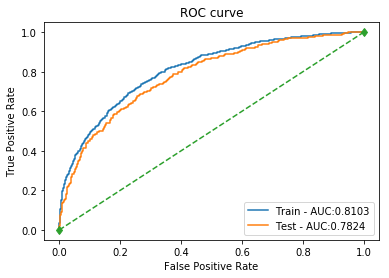

In [94]:
# 逻辑回归
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7956 测试集： 0.7814
[精准率] 训练集： 0.7917 测试集： 0.7238
[召回率] 训练集： 0.2506 测试集： 0.2117
[f1-score] 训练集： 0.3807 测试集： 0.3276
[auc值] 训练集： 0.8132 测试集： 0.7827


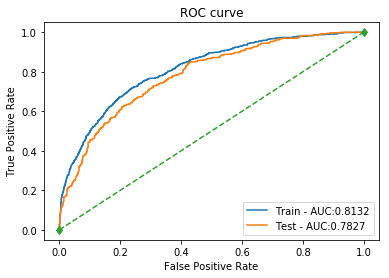

In [95]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7577 测试集： 0.7526
[精准率] 训练集： 1.0000 测试集： 0.7500
[召回率] 训练集： 0.0336 测试集： 0.0251
[f1-score] 训练集： 0.0650 测试集： 0.0485
[auc值] 训练集： 0.8472 测试集： 0.7446


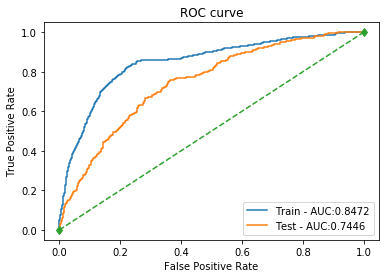

In [96]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7493 测试集： 0.7484
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.8317 测试集： 0.7753


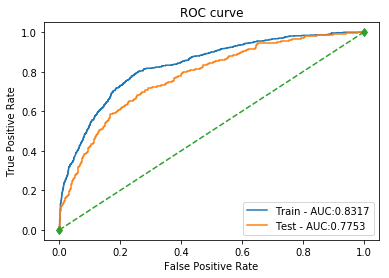

In [97]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7938 测试集： 0.7610
[精准率] 训练集： 0.6535 测试集： 0.5464
[召回率] 训练集： 0.3777 测试集： 0.2953
[f1-score] 训练集： 0.4787 测试集： 0.3834
[auc值] 训练集： 0.7655 测试集： 0.6944


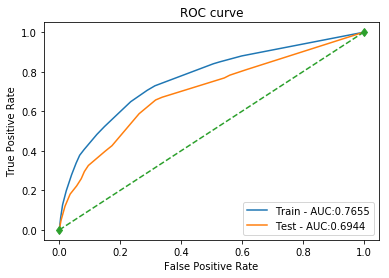

In [98]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8476 测试集： 0.7863
[精准率] 训练集： 0.8330 测试集： 0.6350
[召回率] 训练集： 0.4904 测试集： 0.3538
[f1-score] 训练集： 0.6174 测试集： 0.4544
[auc值] 训练集： 0.9032 测试集： 0.7811


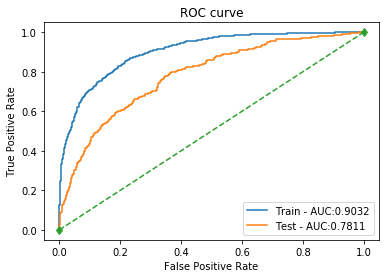

In [99]:
# XGBoost
model_metrics(xgb, X_train, X_test, y_train, y_test)